# Response Time Analysis

In [3]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from string import ascii_letters
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pickle

In [4]:
discrimination_performance_path = '/Users/prachi/Documents/depth_duration/depth_discrimination/TAC_discrim_datafiles/matched_discrim_data/performance.pickle'

with open(discrimination_performance_path, 'rb') as handle:
    discrim_performance = pickle.load(handle)
    

In [43]:
n_VE_estim_diff_250 = [discrim_performance[elem]['VE_depthdifference_250'] for elem in discrim_performance]
n_VE_estim_diff_1000 = [discrim_performance[elem]['VE_depthdifference_1000'] for elem in discrim_performance]

n_VE_accuracy_250 = [discrim_performance[elem]['accuracy_250'][0] for elem in discrim_performance]
n_VE_accuracy_1000 = [discrim_performance[elem]['accuracy_1000'][0] for elem in discrim_performance]

n_VE_ste_250 = [discrim_performance[elem]['accuracy_250'][-2] for elem in discrim_performance]
n_VE_ste_1000 = [discrim_performance[elem]['accuracy_1000'][-2] for elem in discrim_performance]

n_avg_RT_250 = [discrim_performance[elem]['RT_250'][1] for elem in discrim_performance]
n_avg_RT_1000 = [discrim_performance[elem]['RT_1000'][1] for elem in discrim_performance]

n_avg_RT_ste_250 = [discrim_performance[elem]['RT_250'][-1] for elem in discrim_performance]
n_avg_RT_ste_1000 = [discrim_performance[elem]['RT_1000'][-1] for elem in discrim_performance]


n_JV_250 = [discrim_performance[elem]['JV_regressor_250'] for elem in discrim_performance]
n_JV_1000 = [discrim_performance[elem]['JV_regressor_1000'] for elem in discrim_performance]

n_stim = [elem for elem in discrim_performance]

In [55]:
discrim_stimfolders = [elem.split('/')[1] for elem in n_stim]

In [56]:
VE_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_data/matched/VE_data.pickle'

with open(VE_data_path, 'rb') as handle:
    VE_data = pickle.load(handle)

In [57]:
TAC_trial_plot_data = VE_data

## Execute this cell to prep for plotting
TAC_final_x_250 = TAC_trial_plot_data[0][0]
TAC_final_y_250 = TAC_trial_plot_data[1][0]
TAC_ste_250 = TAC_trial_plot_data[2][0]
TAC_stim_250 = TAC_trial_plot_data[3][0]
TAC_std_250 = TAC_trial_plot_data[4][0]
TAC_RT_250 = TAC_trial_plot_data[5][0]
TAC_nl_RT_250 = TAC_trial_plot_data[6][0]


TAC_final_x_500 = TAC_trial_plot_data[0][1]
TAC_final_y_500 = TAC_trial_plot_data[1][1]
TAC_ste_500 = TAC_trial_plot_data[2][1]
TAC_stim_500 = TAC_trial_plot_data[3][1]
TAC_std_500 = TAC_trial_plot_data[4][1]
TAC_RT_500 = TAC_trial_plot_data[5][1]
TAC_nl_RT_500 = TAC_trial_plot_data[6][1]


TAC_final_x_750 = TAC_trial_plot_data[0][2]
TAC_final_y_750 = TAC_trial_plot_data[1][2]
TAC_ste_750 = TAC_trial_plot_data[2][2]
TAC_stim_750 = TAC_trial_plot_data[3][2]
TAC_std_750 = TAC_trial_plot_data[4][2]
TAC_RT_750 = TAC_trial_plot_data[5][2]
TAC_nl_RT_750 = TAC_trial_plot_data[6][2]


TAC_final_x_1000 = TAC_trial_plot_data[0][3]
TAC_final_y_1000 = TAC_trial_plot_data[1][3]
TAC_ste_1000 = TAC_trial_plot_data[2][3]
TAC_stim_1000 = TAC_trial_plot_data[3][3]
TAC_std_1000 = TAC_trial_plot_data[4][3]
TAC_RT_1000 = TAC_trial_plot_data[5][3]
TAC_nl_RT_1000 = TAC_trial_plot_data[6][3]


In [58]:
VE_stimfolders = [elem.split('/')[1] for elem in TAC_final_x_250]


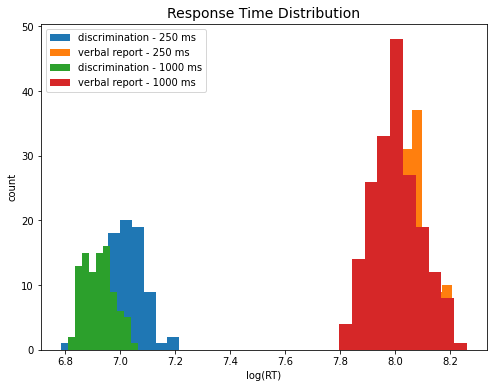

In [22]:
plt.figure(figsize=[8,6])
plt.title('Response Time Distribution', fontsize=14)

plt.hist(n_avg_RT_250, label='discrimination - 250 ms')
plt.hist(TAC_nl_RT_250, label='verbal report - 250 ms')

plt.hist(n_avg_RT_1000, label='discrimination - 1000 ms')
plt.hist(TAC_nl_RT_1000, label='verbal report - 1000 ms')

plt.xlabel('log(RT)')
plt.ylabel('count')

plt.legend()
plt.show();

## Does Accuracy predict RT? 

#### Verbal Judgement

TAC m: [3.01219603]
TAC b: 7.823326787608597
TAC R-squared:  0.20097247012343866
(0.44829953170111486, 7.00189360310599e-11)


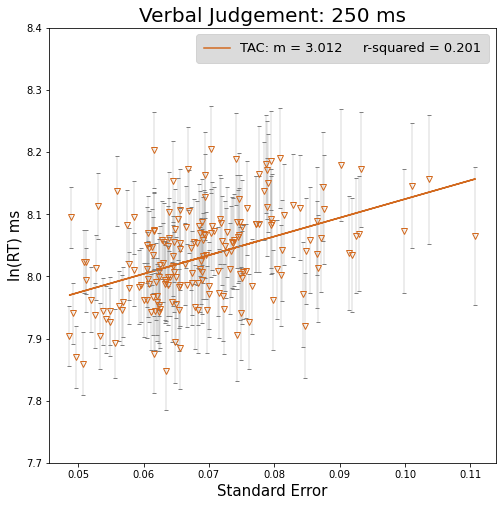

In [26]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize = [8,8])
#run regression
TAC_X_250 = np.array(TAC_ste_250).reshape(-1,1)
TAC_y_250 = TAC_nl_RT_250
TAC_reg_250 = LinearRegression().fit(TAC_X_250, TAC_y_250)

#Generated Predictions
TAC_y_predicted_250 = TAC_reg_250.predict(TAC_X_250)
#Plot Our Actual and Predicted Values
# plt.plot(TAC_X_250, TAC_y_250, 'v', fillstyle='none', alpha = 1);
plt.plot(TAC_X_250,TAC_y_predicted_250,color='chocolate', label = 'TAC: m = ' + str(round(TAC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(TAC_reg_250.score(TAC_X_250, TAC_y_250)), 3)))
plt.title("Verbal Judgement: 250 ms", fontsize = 20)
plt.xlabel("Standard Error", fontsize = 15)
plt.ylabel("ln(RT) ms", fontsize = 15)
plt.errorbar(TAC_X_250, TAC_y_250, yerr=TAC_ste_250, elinewidth = 0.3, ecolor = "gray", fmt = 'or', mfc = "white", 
             mec = "chocolate", capsize = 2, marker='v', fillstyle='none')

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')


plt.yticks(np.arange(7.7, 8.5, 0.1))

#get coefficients and y intercept
print("TAC m: {0}".format(TAC_reg_250.coef_))
print("TAC b: {0}".format(TAC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("TAC R-squared: ", TAC_reg_250.score(TAC_X_250, TAC_y_250))

round(float(TAC_reg_250.score(TAC_X_250, TAC_y_250)), 3)

print(scipy.stats.pearsonr(TAC_ste_250, TAC_nl_RT_250))

TAC m: [3.46369081]
TAC b: 7.749901620897965
TAC R-squared:  0.2130477413911852
(0.46157094946626104, 1.602725533079475e-11)


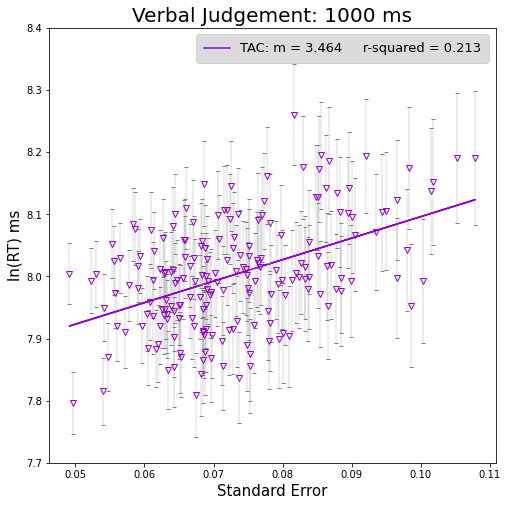

In [27]:
plt.figure(figsize = [8,8])
#run regression
TAC_X_1000 = np.array(TAC_ste_1000).reshape(-1,1)
TAC_y_1000 = TAC_nl_RT_1000
TAC_reg_1000 = LinearRegression().fit(TAC_X_1000, TAC_y_1000)

#Generated Predictions
TAC_y_predicted_1000 = TAC_reg_1000.predict(TAC_X_1000)
#Plot Our Actual and Predicted Values
# plt.plot(TAC_X_250, TAC_y_250, 'v', fillstyle='none', alpha = 1);
plt.plot(TAC_X_1000,TAC_y_predicted_1000,color='darkviolet', label = 'TAC: m = ' + str(round(TAC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(TAC_reg_1000.score(TAC_X_1000, TAC_y_1000)), 3)))
plt.title("Verbal Judgement: 1000 ms", fontsize = 20)
plt.xlabel("Standard Error", fontsize = 15)
plt.ylabel("ln(RT) ms", fontsize = 15)
plt.errorbar(TAC_X_1000, TAC_y_1000, yerr=TAC_ste_1000, elinewidth = 0.3, ecolor = "gray", fmt = 'or', mfc = "white", 
             mec = "darkviolet", capsize = 2, marker='v', fillstyle='none')

legend = plt.legend(loc = 0, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.yticks(np.arange(7.7, 8.5, 0.1))


#get coefficients and y intercept
print("TAC m: {0}".format(TAC_reg_1000.coef_))
print("TAC b: {0}".format(TAC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("TAC R-squared: ", TAC_reg_1000.score(TAC_X_1000, TAC_y_1000))

round(float(TAC_reg_1000.score(TAC_X_1000, TAC_y_1000)), 3)
print(scipy.stats.pearsonr(TAC_ste_1000, TAC_nl_RT_1000))

#### Discrimination

In [29]:
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)


m: [-0.25996081]
b: 7.198243955472372
R-squared:  0.4004529918331464
(-0.632813552188278, 7.776647711748577e-12)


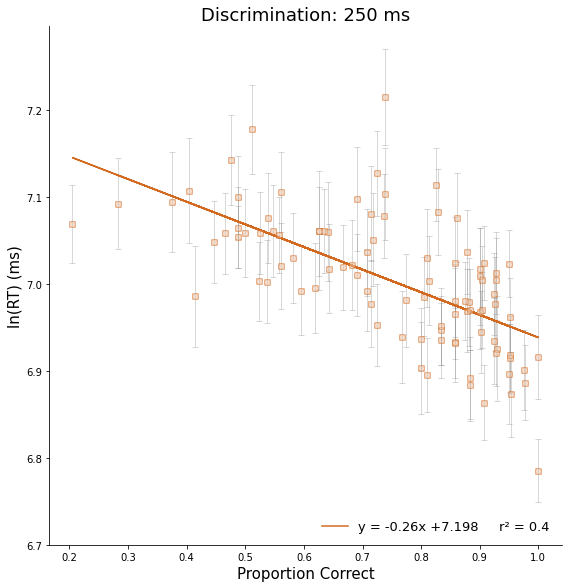

In [34]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(n_VE_accuracy_250).reshape(-1,1)
y_250 = n_avg_RT_250
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)
#Plot Our Actual and Predicted Values
plt.errorbar(X_250, y_250,elinewidth=1, ecolor='gray',fmt='or', mfc='white', mec='chocolate', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_250));

plt.plot(X_250, y_250, 's', color='chocolate', alpha = 0.3);
plt.plot(X_250, y_predicted_250,color='chocolate', label = 'y = ' + str(round(reg_250.coef_[0], 3))
        +'x +'+str(round(reg_250.intercept_, 3))  + '     r' + get_super('2') + ' = '+ str(round(float(reg_250.score(X_250, y_250)), 3)))

plt.xlabel("Proportion Correct", fontsize = 15)
plt.ylabel("ln(RT) (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

# plt.xticks(np.arange(0.15,1.2, 0.2))
plt.yticks(np.arange(6.7,7.3, .1))

plt.title('Discrimination: 250 ms', fontsize=18)

#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))
print(scipy.stats.pearsonr(n_VE_accuracy_250, n_avg_RT_250))

m: [-0.15491078]
b: 7.038683653529005
R-squared:  0.30205632004752514
(-0.5495965065823524, 9.648497633569958e-09)


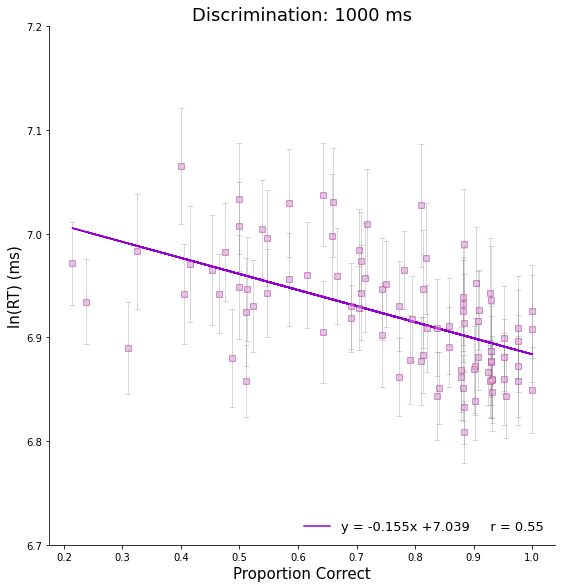

In [36]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(n_VE_accuracy_1000).reshape(-1,1)
y_1000 = n_avg_RT_1000
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values

plt.errorbar(X_1000, y_1000, elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='chocolate', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_1000));

r = np.sqrt(float(reg_1000.score(X_1000, y_1000)))

plt.plot(X_1000, y_1000, 's', color='darkviolet', alpha = 0.3);
plt.plot(X_1000, y_predicted_1000,color='darkviolet', label = 'y = ' + str(round(reg_1000.coef_[0], 3))
        +'x +'+str(round(reg_1000.intercept_, 3))  + '     r = '+ str(round(float(r), 3)))

plt.xlabel("Proportion Correct", fontsize = 15)
plt.ylabel("ln(RT) (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

plt.yticks(np.arange(6.7,7.3, .1))

plt.title('Discrimination: 1000 ms', fontsize=18)

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))
print(scipy.stats.pearsonr(n_VE_accuracy_1000, n_avg_RT_1000))


## VE RT x Discrim RT 

In [60]:
# discrim_stimfolders, n_avg_RT_250, n_avg_RT_1000
# VE_stimfolders, TAC_nl_RT_250, TAC_nl_RT_1000

In [70]:
arr_discrim250RT = []
arr_discrim1000RT = []
arr_VE250RT = []
arr_VE1000RT = []


for key in discrim_performance:
    im0 = key.split('/')[1]
    im1 = discrim_performance[key]['stimulus_1'].split('/')[1]
    dtrial_250_RT = discrim_performance[key]['RT_250'][1]
    arr_discrim250RT.append(dtrial_250_RT)
    dtrial_1000_RT = discrim_performance[key]['RT_1000'][1]
    arr_discrim1000RT.append(dtrial_1000_RT)
    
    im0_VE_index = VE_stimfolders.index(im0)
    im1_VE_index = VE_stimfolders.index(im1)
    
    im0_VEtrial_250_RT = TAC_nl_RT_250[im0_VE_index]
    im1_VEtrial_250_RT = TAC_nl_RT_250[im1_VE_index]
    VE_sumRT_250 = im0_VEtrial_250_RT + im1_VEtrial_250_RT
    arr_VE250RT.append(VE_sumRT_250)
    
    im0_VEtrial_1000_RT = TAC_nl_RT_1000[im0_VE_index]
    im1_VEtrial_1000_RT = TAC_nl_RT_1000[im1_VE_index]
    VE_sumRT_1000 = im0_VEtrial_1000_RT + im1_VEtrial_1000_RT
    arr_VE1000RT.append(VE_sumRT_1000)
    
len(arr_discrim250RT), len(arr_discrim1000RT), len(arr_VE250RT), len(arr_VE1000RT)

(94, 94, 94, 94)

m: [0.15101236]
b: 4.578323333550352
R-squared:  0.05375602158378745
(0.2318534485052718, 0.02454052821828666)


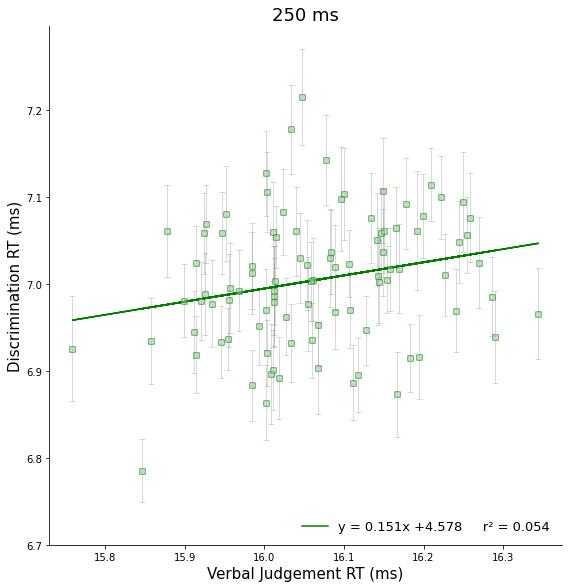

In [76]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_250 = np.array(arr_VE250RT).reshape(-1,1)
y_250 = arr_discrim250RT
reg_250 = LinearRegression().fit(X_250, y_250)

#Generated Predictions
y_predicted_250 = reg_250.predict(X_250)
#Plot Our Actual and Predicted Values
plt.errorbar(X_250, y_250,elinewidth=1, ecolor='gray',fmt='or', mfc='white', mec='green', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_250));

plt.plot(X_250, y_250, 's', color='green', alpha = 0.3);
plt.plot(X_250, y_predicted_250,color='green', label = 'y = ' + str(round(reg_250.coef_[0], 3))
        +'x +'+str(round(reg_250.intercept_, 3))  + '     r' + get_super('2') + ' = '+ str(round(float(reg_250.score(X_250, y_250)), 3)))

plt.xlabel("Verbal Judgement RT (ms)", fontsize = 15)
plt.ylabel("Discrimination RT (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

# plt.xticks(np.arange(0.15,1.2, 0.2))
plt.yticks(np.arange(6.7,7.3, .1))

plt.title('250 ms', fontsize=18)

#get coefficients and y intercept
print("m: {0}".format(reg_250.coef_))
print("b: {0}".format(reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_250.score(X_250, y_250))
print(scipy.stats.pearsonr(arr_VE250RT, arr_discrim250RT))

m: [0.10745764]
b: 5.2021423152215185
R-squared:  0.0648099411858919
(0.25457796681152695, 0.013281055454114716)


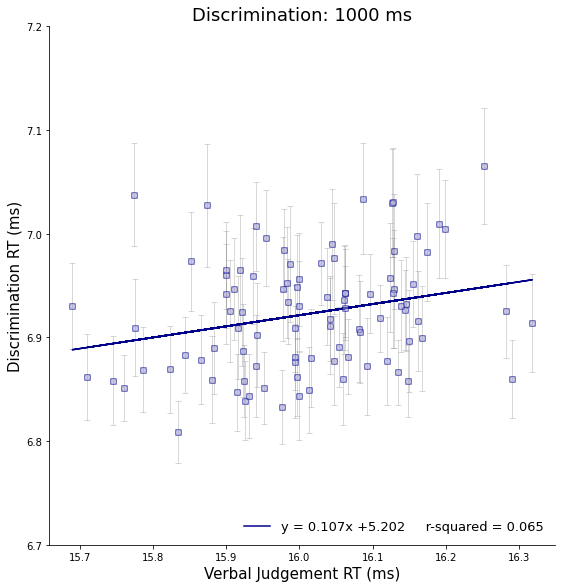

In [79]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)

#run regression
X_1000 = np.array(arr_VE1000RT).reshape(-1,1)
y_1000 = arr_discrim1000RT
reg_1000 = LinearRegression().fit(X_1000, y_1000)

#Generated Predictions
y_predicted_1000 = reg_1000.predict(X_1000)
#Plot Our Actual and Predicted Values

plt.errorbar(X_1000, y_1000, elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='darkblue', capsize=3, alpha = 0.3, yerr = np.array(n_avg_RT_ste_1000));

plt.plot(X_1000, y_1000, 's', color='darkblue', alpha = 0.3);
plt.plot(X_1000, y_predicted_1000,color='darkblue', label = 'y = ' + str(round(reg_1000.coef_[0], 3))
        +'x +'+str(round(reg_1000.intercept_, 3))  + '     r-squared = '+ str(round(float(reg_1000.score(X_1000, y_1000)), 3)))

plt.xlabel("Verbal Judgement RT (ms)", fontsize = 15)
plt.ylabel("Discrimination RT (ms)", fontsize = 15)


legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

fig.tight_layout()

plt.yticks(np.arange(6.7,7.3, .1))

plt.title('Discrimination: 1000 ms', fontsize=18)

#get coefficients and y intercept
print("m: {0}".format(reg_1000.coef_))
print("b: {0}".format(reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg_1000.score(X_1000, y_1000))
print(scipy.stats.pearsonr(arr_VE1000RT, arr_discrim1000RT))

                 Discrim 250 RT  Discrim 1000 RT  VE 250 RT  VE 1000 RT
Discrim 250 RT         1.000000         0.550691   0.231853    0.175159
Discrim 1000 RT        0.550691         1.000000   0.223076    0.254578
VE 250 RT              0.231853         0.223076   1.000000    0.071603
VE 1000 RT             0.175159         0.254578   0.071603    1.000000


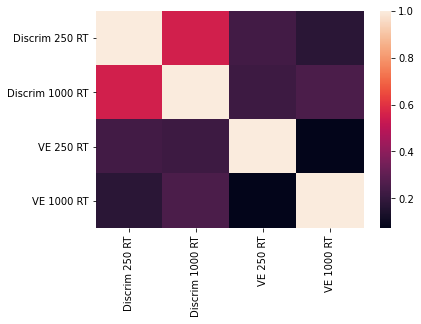

In [92]:
import pandas as pd

data = {'Discrim 250 RT': arr_discrim250RT,
        'Discrim 1000 RT': arr_discrim1000RT,
        'VE 250 RT': arr_VE250RT,
        'VE 1000 RT': arr_VE1000RT
        }

df = pd.DataFrame(data,columns=['Discrim 250 RT','Discrim 1000 RT','VE 250 RT', 'VE 1000 RT'])

sns.heatmap(df.corr());

print(df.corr())



                 Discrim_PC_250  Discrim_PC_1000  VE_PC_250  VE_PC_1000
Discrim_PC_250         1.000000         0.718103   0.563954    0.599037
Discrim_PC_1000        0.718103         1.000000   0.589019    0.694674
VE_PC_250              0.563954         0.589019   1.000000    0.794817
VE_PC_1000             0.599037         0.694674   0.794817    1.000000


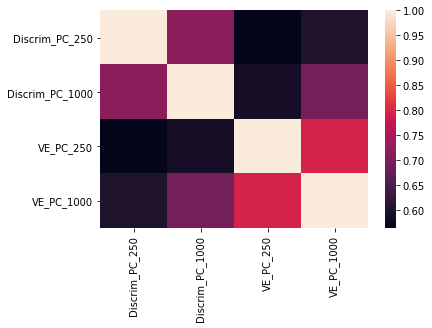

In [90]:
import pandas as pd

data = {'Discrim_PC_250': Discrim_PC_250,
        'Discrim_PC_1000': Discrim_PC_1000,
        'VE_PC_250': VE_PC_250,
        'VE_PC_1000': VE_PC_1000
        }

df = pd.DataFrame(data,columns=['Discrim_PC_250','Discrim_PC_1000','VE_PC_250', 'VE_PC_1000'])

sns.heatmap(df.corr());

print(df.corr())

In [ ]:
# 8x8 matrix
# correlate cue values with each of these seperate measures 
# Joint variance between VE 250 VE 1000 
# ground plane on reaction time 